In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('HousePricePrediction.xlsx')
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


1	Id	To count the records.

2	MSSubClass	 Identifies the type of dwelling involved in the sale.

3	MSZoning	Identifies the general zoning classification of the sale.

4	LotArea	 Lot size in square feet.

5	LotConfig	Configuration of the lot

6	BldgType	Type of dwelling

7	OverallCond	Rates the overall condition of the house

8	YearBuilt	Original construction year

9	YearRemodAdd	Remodel date (same as construction date if no remodeling or additions).

10	Exterior1st	Exterior covering on house

11	BsmtFinSF2	Type 2 finished square feet.

12	TotalBsmtSF	Total square feet of basement area

13	SalePrice	To be predicted

# EDA

In [3]:
df.shape

(2919, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
df.SalePrice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<Axes: >

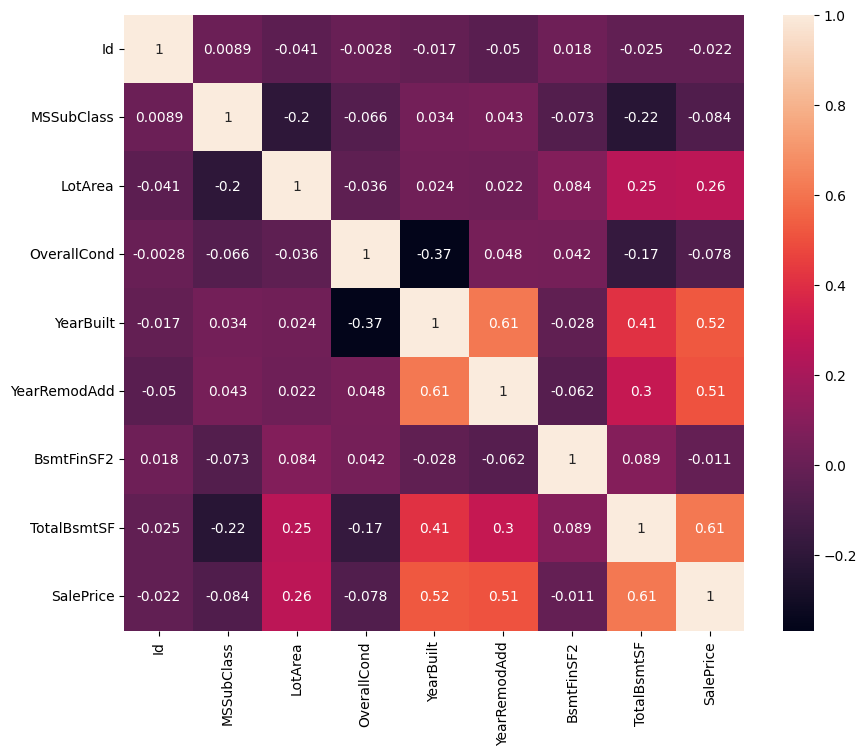

In [8]:
num_df = df.select_dtypes(np.number)
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), color='Blue', annot=True)

In [9]:
#creating copy of Dataset
new_df = df.copy()

In [10]:
new_df.drop('Id', axis=1, inplace=True)

<Axes: xlabel='MSZoning'>

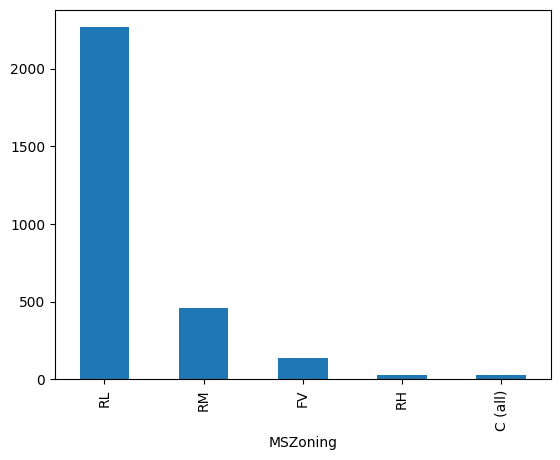

In [11]:
new_df.MSZoning.value_counts().plot(kind='bar')

<Axes: xlabel='LotConfig'>

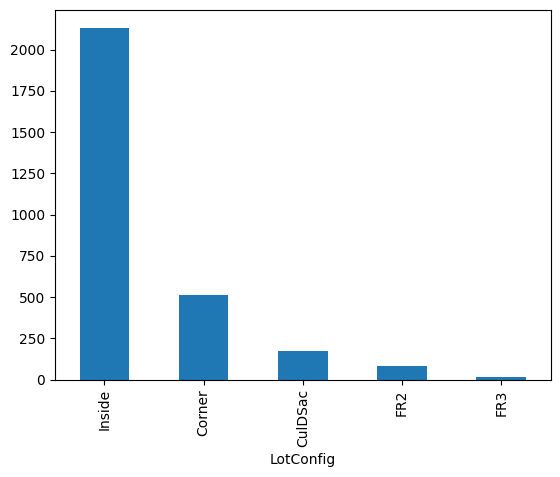

In [12]:
new_df.LotConfig.value_counts().plot(kind='bar')

<Axes: xlabel='BldgType'>

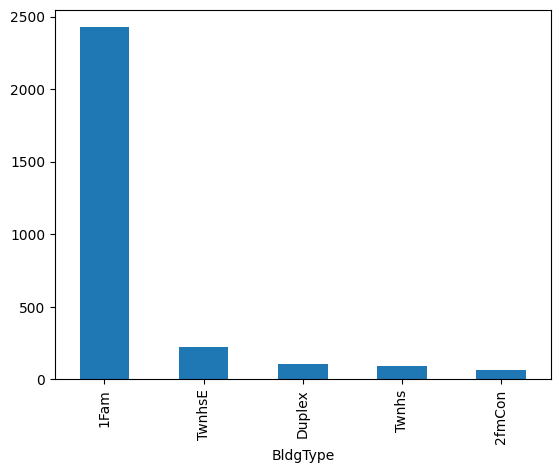

In [13]:
new_df.BldgType.value_counts().plot(kind='bar')

<Axes: xlabel='Exterior1st'>

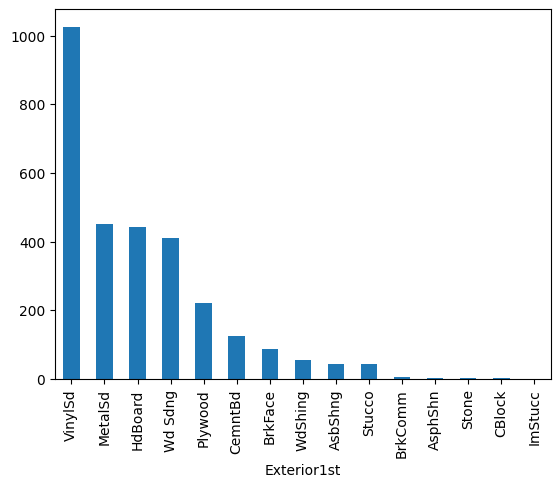

In [14]:
new_df.Exterior1st.value_counts().plot(kind='bar')

In [15]:
#Selecting value which is more than a certain Threshold to reduce Dimensionality When it pass in OneHotEncoder
count = new_df.Exterior1st.value_counts()
other = count[count < 40].index
print(other)
new_df.Exterior1st = new_df.Exterior1st.replace(other, 'Other')

Index(['BrkComm', 'AsphShn', 'Stone', 'CBlock', 'ImStucc'], dtype='object', name='Exterior1st')


In [16]:
new_df.Exterior1st.value_counts()

,count
Exterior1st,
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
BrkFace,87
WdShing,56
AsbShng,44


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

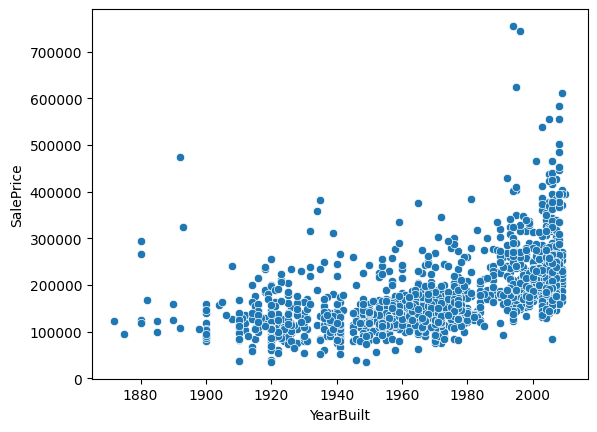

In [17]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data = new_df)

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

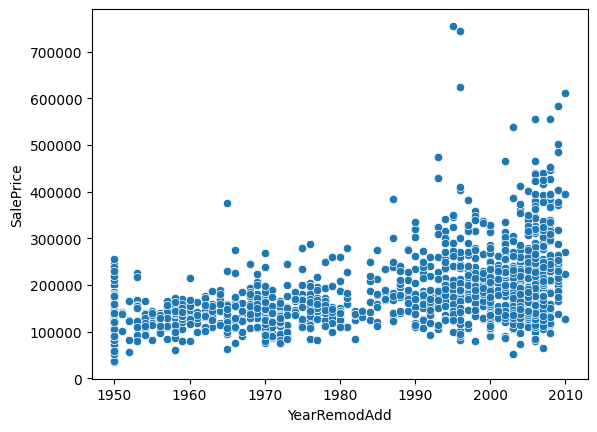

In [18]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=new_df)

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [20]:
# Creating Columns name list to further help in tasks
num_cols = new_df.select_dtypes(np.number).columns.to_list()
cat_cols = new_df.select_dtypes('object').columns.to_list()

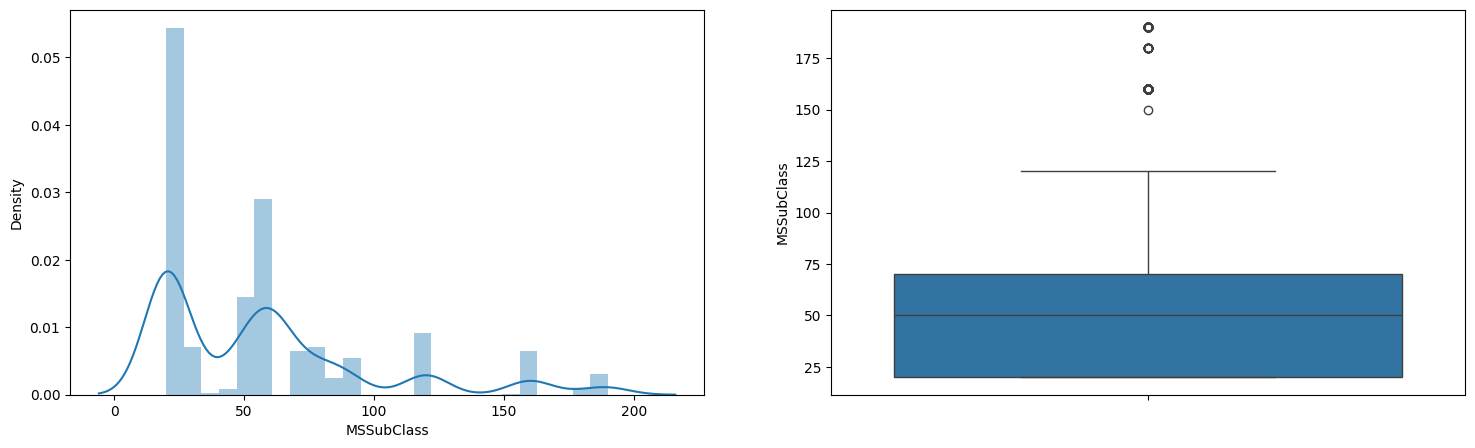

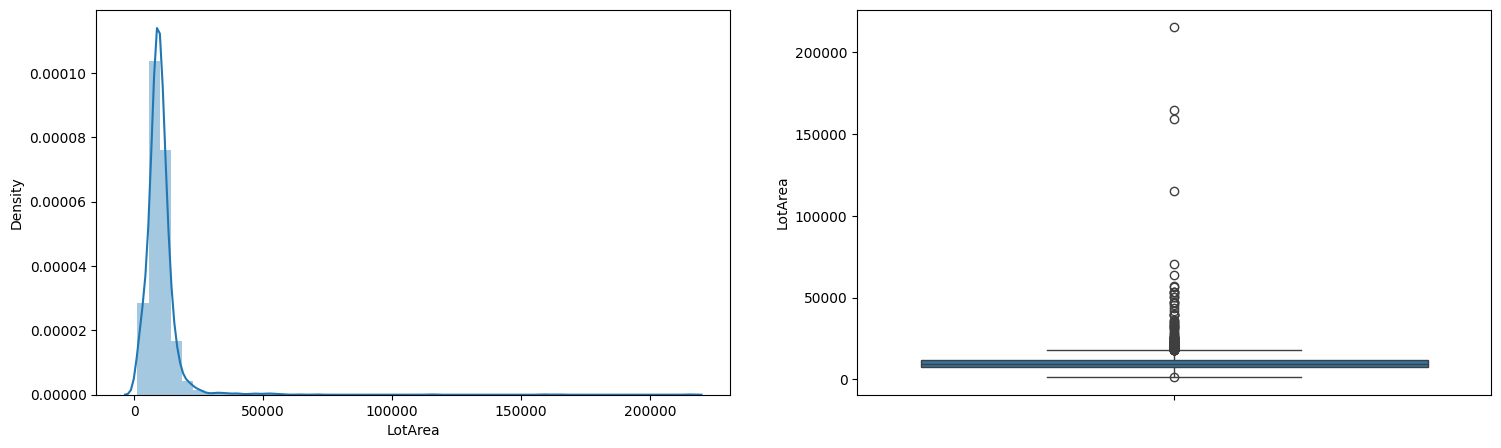

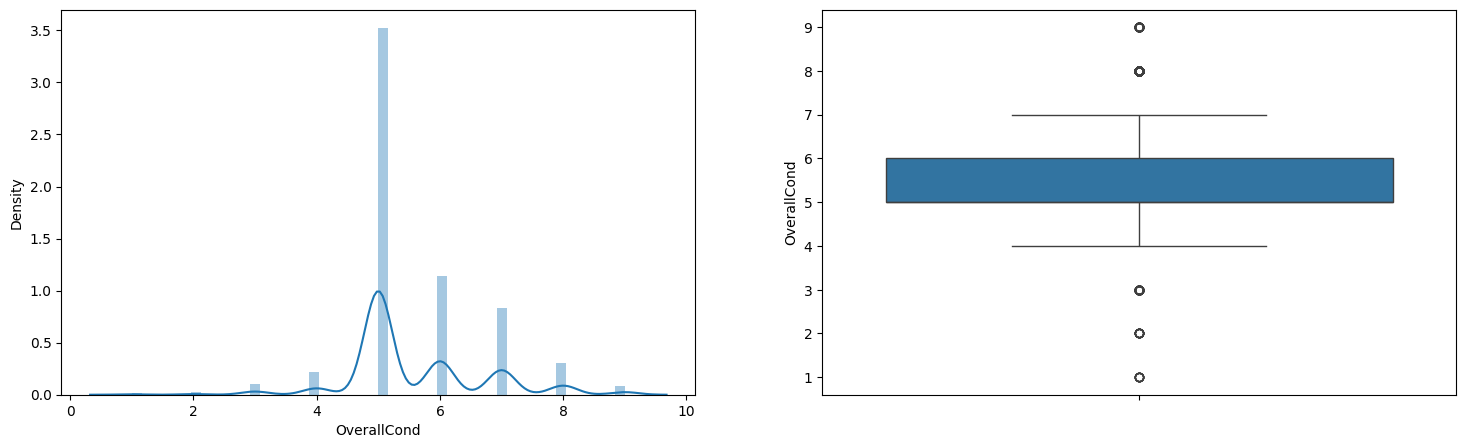

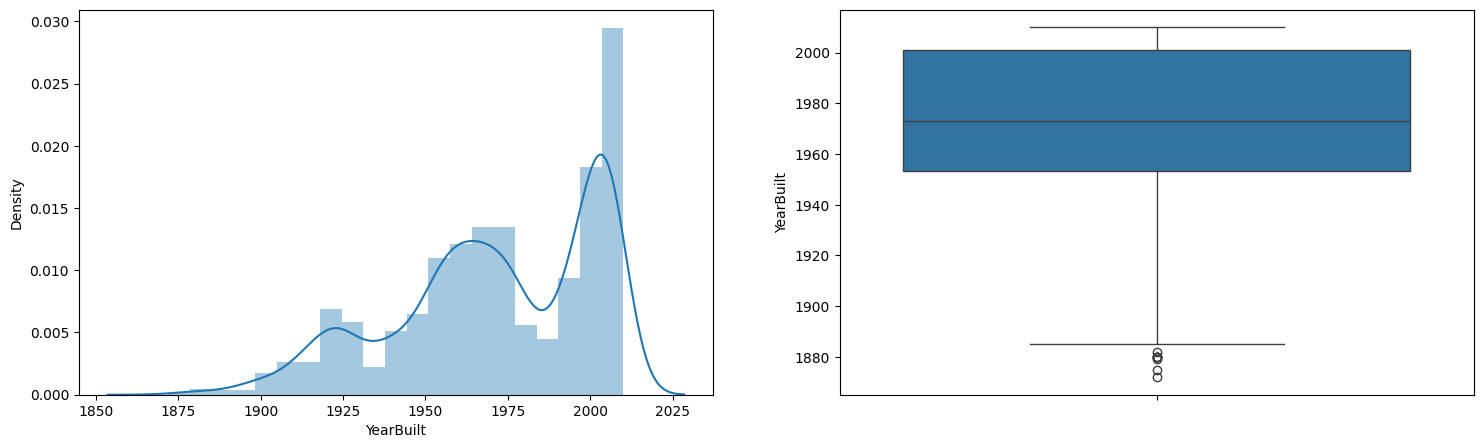

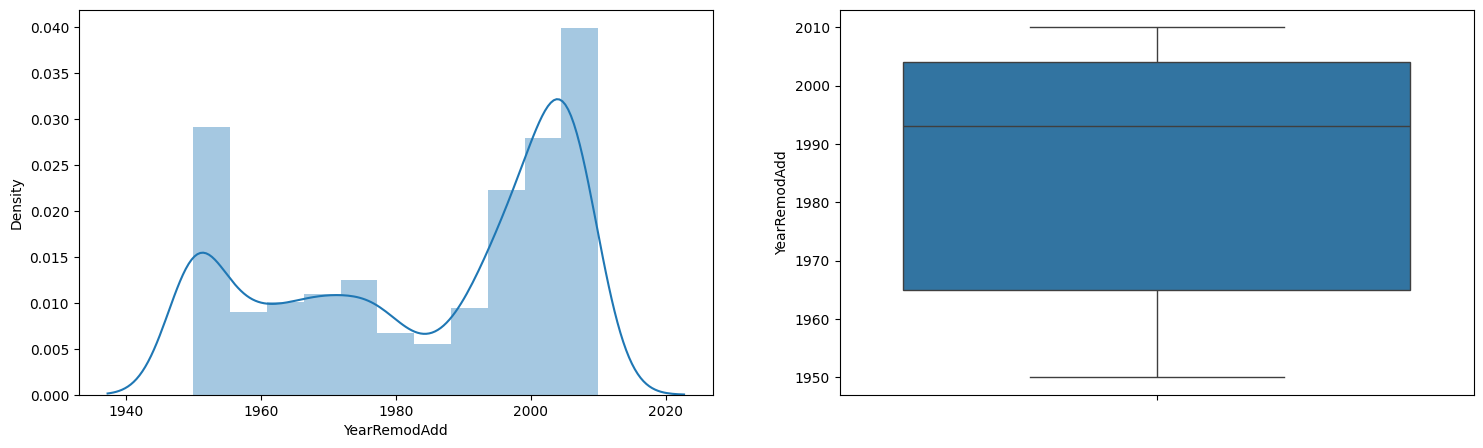

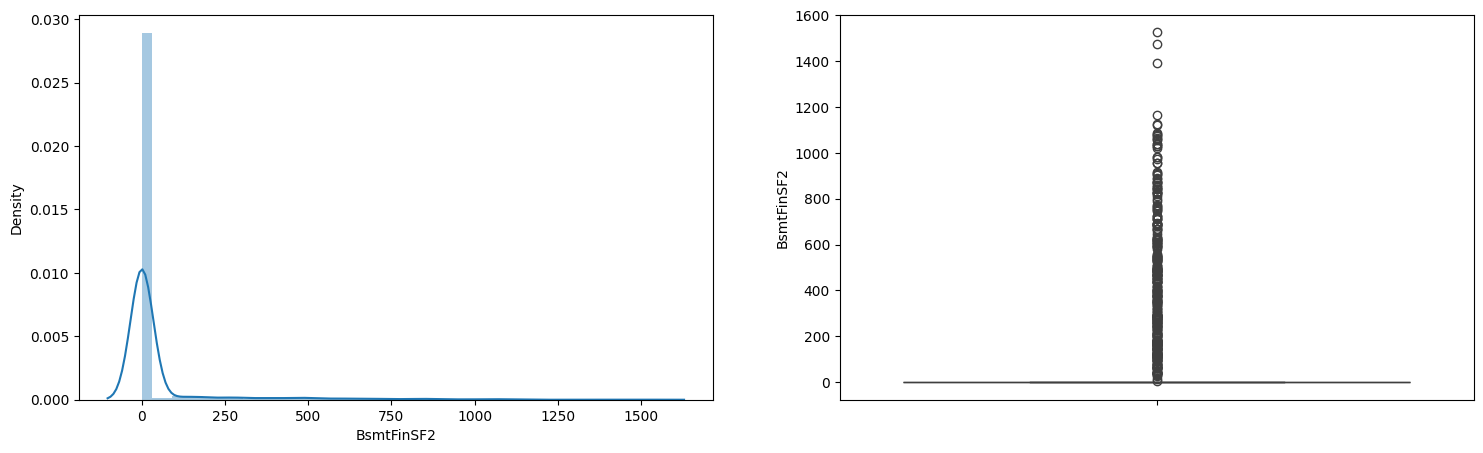

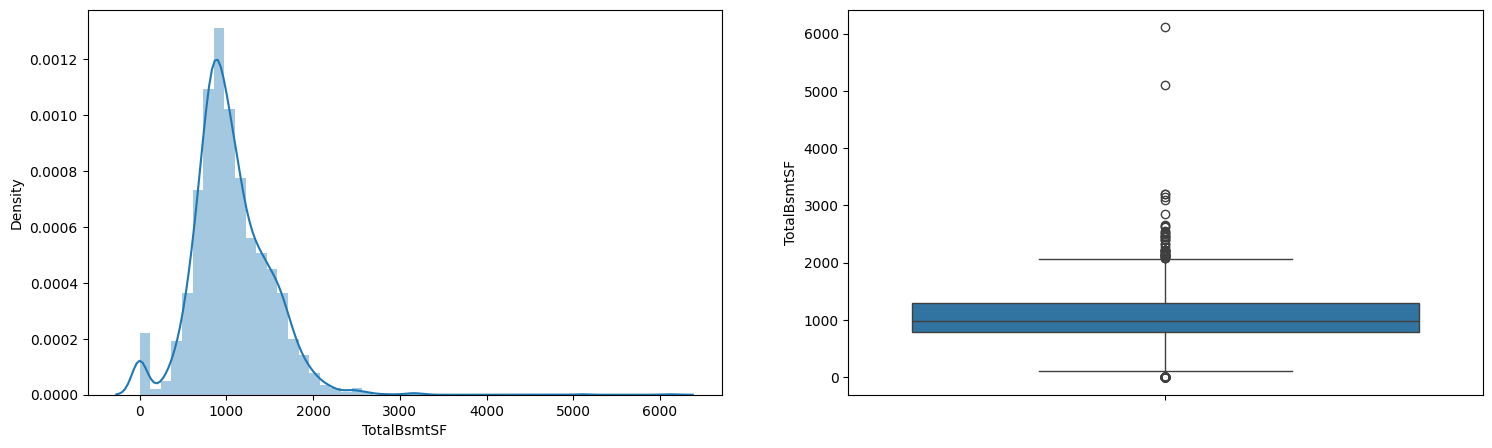

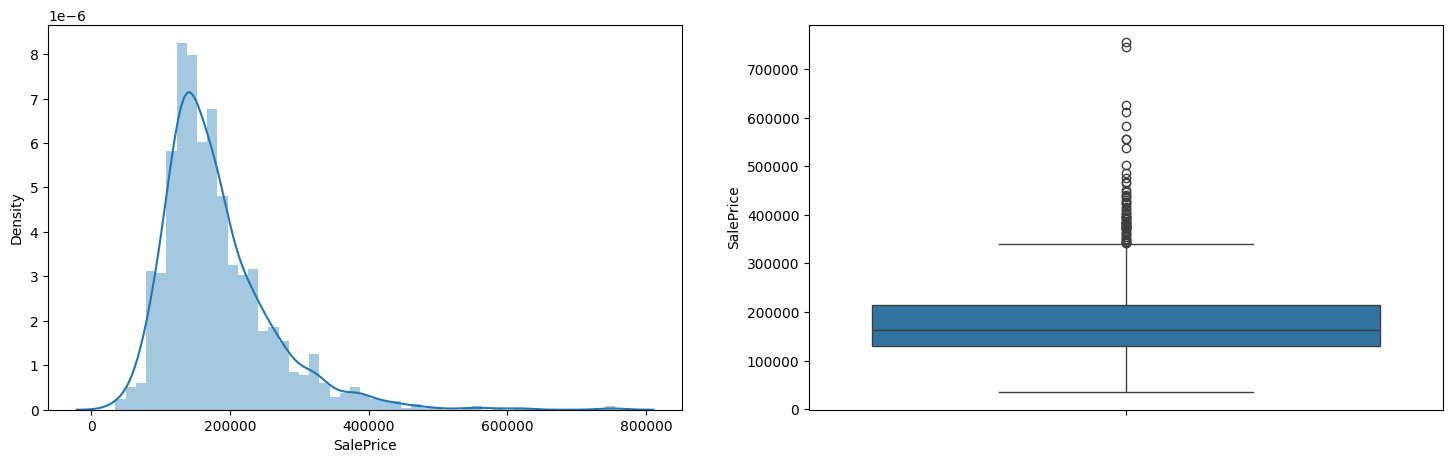

In [21]:
for col in num_cols:
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(121)
    sns.distplot(new_df[col])

    ax1 = f.add_subplot(122)
    sns.boxplot(new_df[col])

#  Preparing Data for Preprocessing

In [22]:
num_cols.remove('SalePrice')
new_df[num_cols].isna().sum()

,0
MSSubClass,0
LotArea,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
BsmtFinSF2,1
TotalBsmtSF,1


In [24]:
new_df.dropna(subset=['BsmtFinSF2', "TotalBsmtSF"], inplace=True, axis=0)

In [25]:
new_df[num_cols].isna().sum()

,0
MSSubClass,0
LotArea,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
BsmtFinSF2,0
TotalBsmtSF,0


In [26]:
# Almost Half the dataset is missing Target column so we will use that as the test dataset
test_df = new_df[new_df.SalePrice.isnull()]

In [27]:
test_df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1460,20,RH,11622,Inside,1Fam,6,1961,1961,VinylSd,144.0,882.0,NaN
1461,20,RL,14267,Corner,1Fam,6,1958,1958,Wd Sdng,0.0,1329.0,NaN
1462,60,RL,13830,Inside,1Fam,5,1997,1998,VinylSd,0.0,928.0,NaN
1463,60,RL,9978,Inside,1Fam,6,1998,1998,VinylSd,0.0,926.0,NaN
1464,120,RL,5005,Inside,TwnhsE,5,1992,1992,HdBoard,0.0,1280.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [28]:
#removing SalePrice Column and nan rows
test_df.drop('SalePrice', axis=1, inplace=True)
test_df.dropna(axis=0, inplace=True)

In [29]:
new_df = new_df.dropna(subset=['SalePrice'], axis=0)

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotArea       1460 non-null   int64  
 3   LotConfig     1460 non-null   object 
 4   BldgType      1460 non-null   object 
 5   OverallCond   1460 non-null   int64  
 6   YearBuilt     1460 non-null   int64  
 7   YearRemodAdd  1460 non-null   int64  
 8   Exterior1st   1460 non-null   object 
 9   BsmtFinSF2    1460 non-null   float64
 10  TotalBsmtSF   1460 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 148.3+ KB


In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1453 entries, 1460 to 2918
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1453 non-null   int64  
 1   MSZoning      1453 non-null   object 
 2   LotArea       1453 non-null   int64  
 3   LotConfig     1453 non-null   object 
 4   BldgType      1453 non-null   object 
 5   OverallCond   1453 non-null   int64  
 6   YearBuilt     1453 non-null   int64  
 7   YearRemodAdd  1453 non-null   int64  
 8   Exterior1st   1453 non-null   object 
 9   BsmtFinSF2    1453 non-null   float64
 10  TotalBsmtSF   1453 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 136.2+ KB


# Preprocessing

In [32]:
from sklearn.preprocessing import PowerTransformer

In [33]:
transformer = PowerTransformer()
new_df[num_cols] = transformer.fit_transform(new_df[num_cols])
test_df[num_cols] = transformer.transform(test_df[num_cols])

In [34]:
new_df[num_cols]

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF
0,0.493460,-0.141171,-0.477387,1.151867,0.908055,-0.359384,-0.404029
1,-1.164269,0.105609,2.011352,0.006695,-0.621670,-0.359384,0.508177
2,0.493460,0.413721,-0.477387,1.055357,0.835594,-0.359384,-0.253787
3,0.698191,0.095490,-0.477387,-1.629540,-0.863478,-0.359384,-0.644806
4,0.493460,0.877127,-0.477387,1.007861,0.694898,-0.359384,0.254387
...,...,...,...,...,...,...,...
1455,0.493460,-0.266808,-0.477387,0.960863,0.694898,-0.359384,-0.177387
1456,-1.164269,0.722071,0.440551,0.080711,-0.041619,2.782472,1.092127
1457,0.698191,-0.010330,2.698415,-1.061347,1.134227,-0.359384,0.269755
1458,-1.164269,0.129088,0.440551,-0.823991,0.429676,2.783731,0.106028


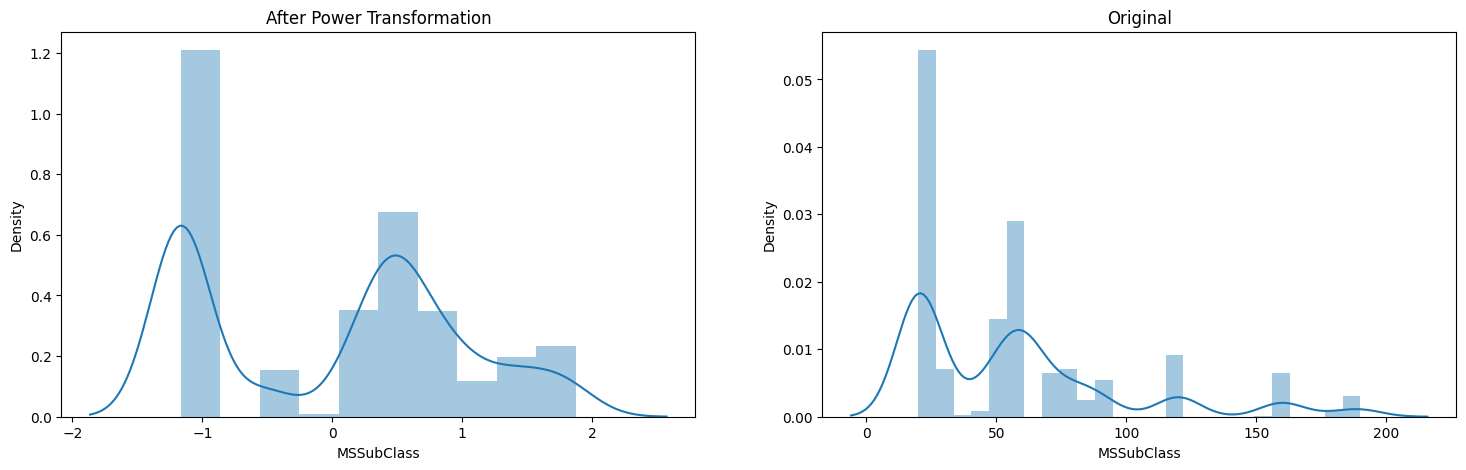

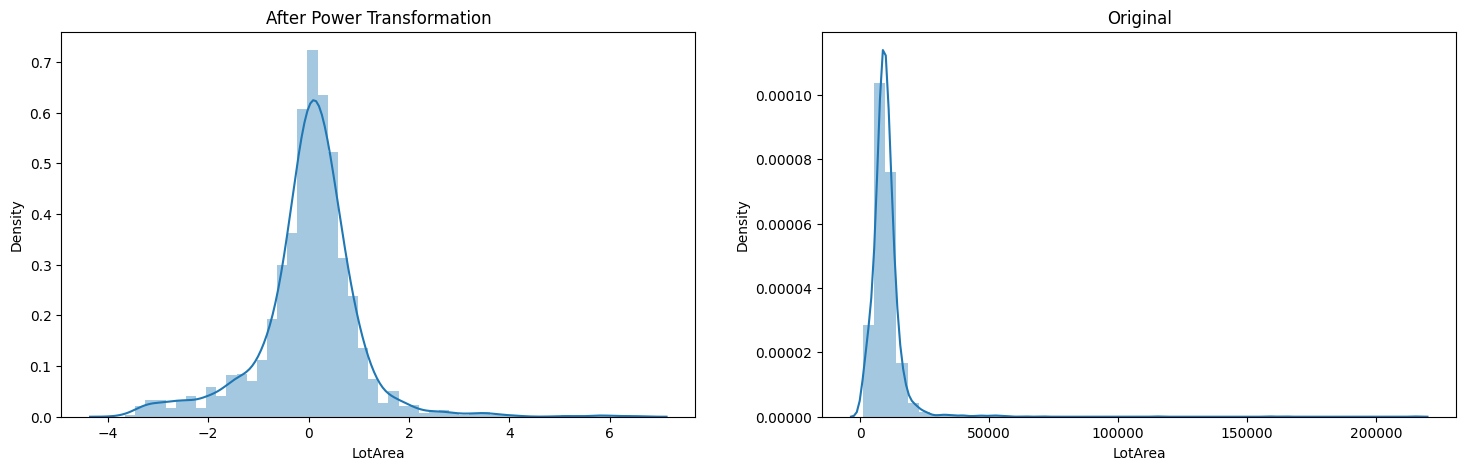

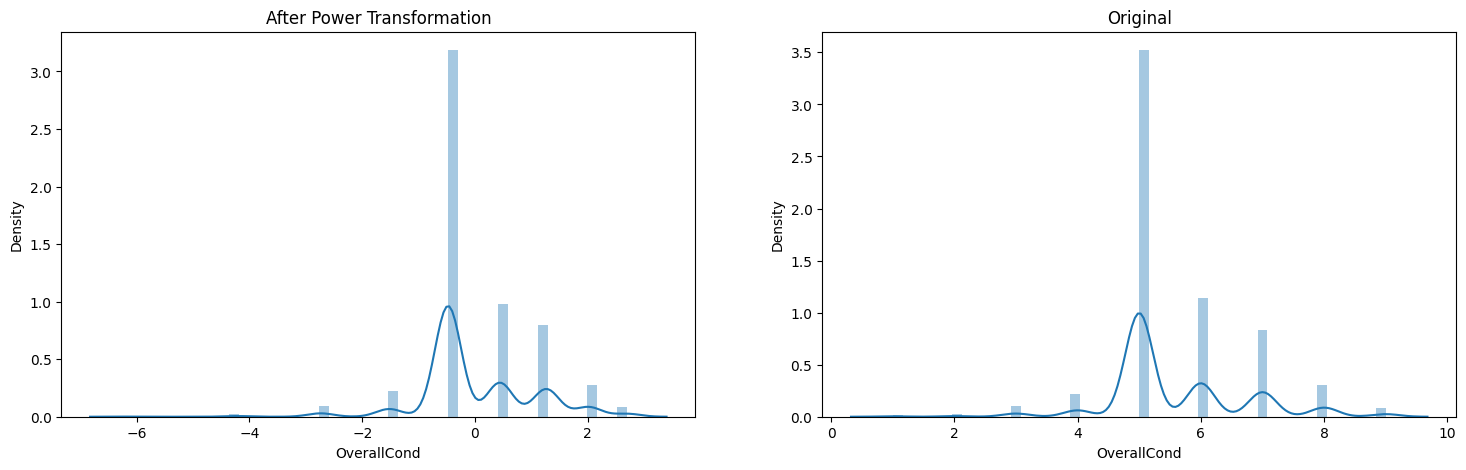

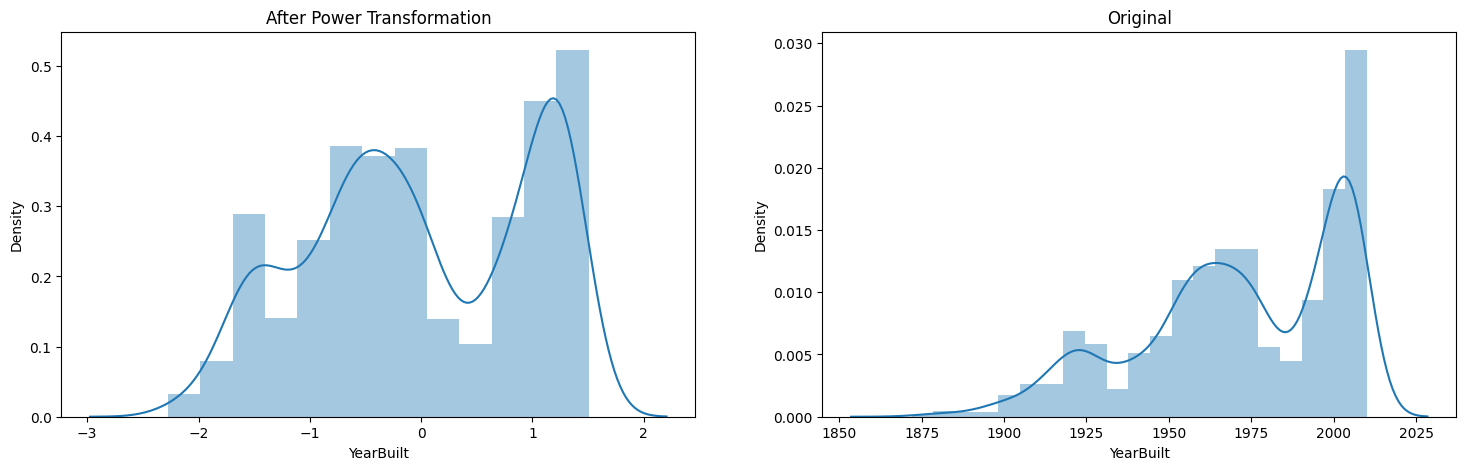

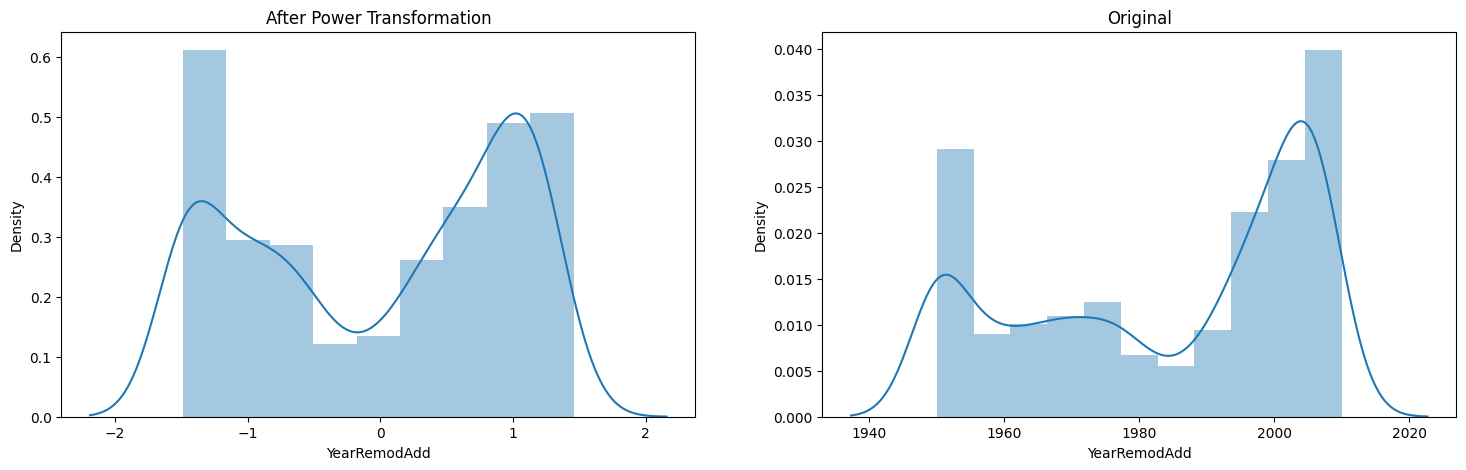

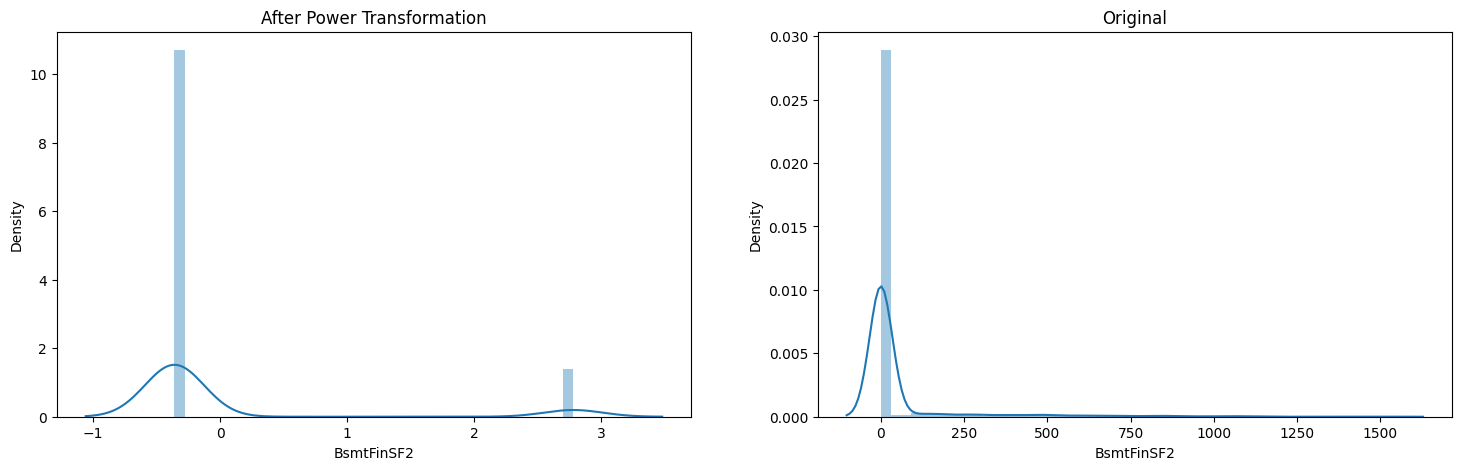

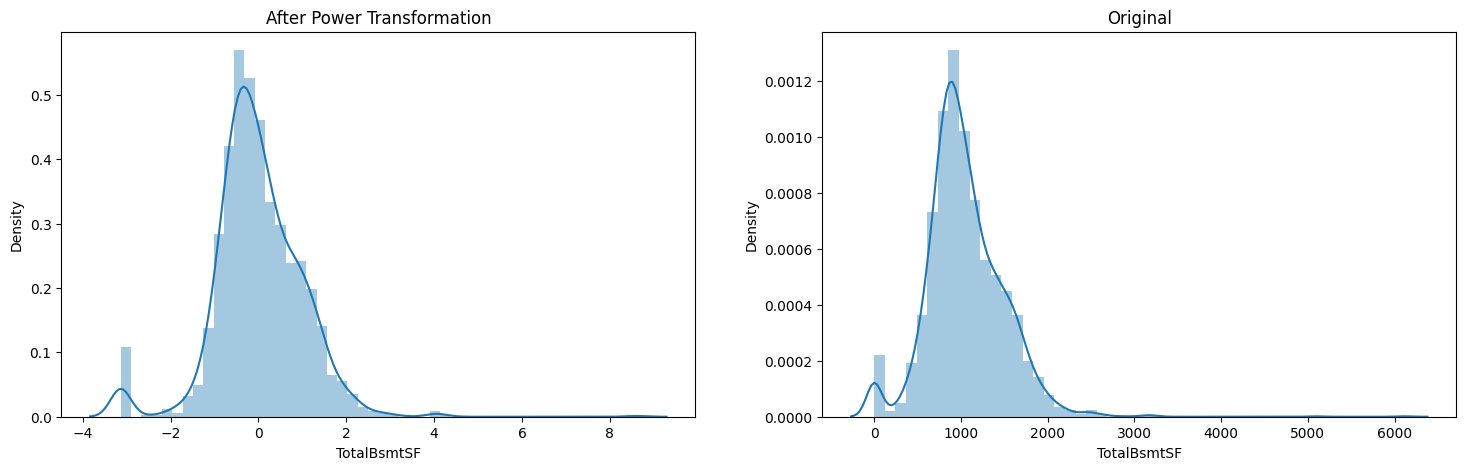

In [35]:
#After and Before normalizing Data
for col in num_cols:
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(121)
    sns.distplot(new_df[col])
    plt.title('After Power Transformation')

    ax1 = f.add_subplot(122)
    sns.distplot(df[col])
    plt.title('Original')

#

# One Hot Encoding

In [36]:
from sklearn.preprocessing import  OneHotEncoder

In [37]:
#creating OHE object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#fitting datset
encoder.fit(new_df[cat_cols])

#Getting encoded Columns name out
encoded_cols = encoder.get_feature_names_out()

# Transforming x datset
new_df[encoded_cols] = encoder.transform(new_df[cat_cols])

#transforming test dataset
test_df[encoded_cols] = encoder.transform(test_df[cat_cols])

In [38]:
new_df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.493460,RL,-0.141171,Inside,1Fam,-0.477387,1.151867,0.908055,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.164269,RL,0.105609,FR2,1Fam,2.011352,0.006695,-0.621670,MetalSd,-0.359384,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.493460,RL,0.413721,Inside,1Fam,-0.477387,1.055357,0.835594,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.698191,RL,0.095490,Corner,1Fam,-0.477387,-1.629540,-0.863478,Wd Sdng,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.493460,RL,0.877127,FR2,1Fam,-0.477387,1.007861,0.694898,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.493460,RL,-0.266808,Inside,1Fam,-0.477387,0.960863,0.694898,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,-1.164269,RL,0.722071,Inside,1Fam,0.440551,0.080711,-0.041619,Plywood,2.782472,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,0.698191,RL,-0.010330,Inside,1Fam,2.698415,-1.061347,1.134227,CemntBd,-0.359384,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,-1.164269,RL,0.129088,Inside,1Fam,0.440551,-0.823991,0.429676,MetalSd,2.783731,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
test_df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
1460,-1.164269,RH,0.477105,Inside,1Fam,0.440551,-0.500661,-1.175682,VinylSd,2.782196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1461,-1.164269,RL,0.878090,Corner,1Fam,0.440551,-0.592683,-1.267783,Wd Sdng,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1462,0.493460,RL,0.817091,Inside,1Fam,-0.477387,0.868345,0.559661,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1463,0.493460,RL,0.180493,Inside,1Fam,0.440551,0.914360,0.559661,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1464,1.363243,RL,-1.143948,Inside,TwnhsE,-0.477387,0.645435,0.184672,HdBoard,-0.359384,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.687476,RM,-2.921454,Inside,Twnhs,1.263440,-0.206089,-0.863478,CemntBd,-0.359384,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,1.687476,RM,-2.961881,Inside,TwnhsE,-0.477387,-0.206089,-0.863478,CemntBd,-0.359384,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2916,-1.164269,RL,1.544205,Inside,1Fam,1.263440,-0.531666,0.429676,VinylSd,-0.359384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.946707,RL,0.268558,Inside,1Fam,-0.477387,0.645435,0.184672,HdBoard,-0.359384,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting Data into Train,Test

In [40]:
x = new_df[num_cols].join(new_df[encoded_cols])
y= new_df['SalePrice']

In [41]:
#Reducing the number of Test Dataset (20% of Training dataset)
test_df = test_df.sample(round(len(x)*20 / 100))
test_df.shape

(292, 37)

# Selecting Best Model

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [43]:
def try_model(*args):

    for model in models:
        print('Mean Accuracy for {} Model:'.format(model), np.mean(cross_val_score(model, x,y, cv=5)))

In [44]:
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), RandomForestRegressor()]

In [45]:
try_model(models)

Mean Accuracy for LinearRegression() Model: 0.6381041969079424
Mean Accuracy for Ridge() Model: 0.6390262790398693
Mean Accuracy for Lasso() Model: 0.6381762842596246
Mean Accuracy for ElasticNet() Model: 0.5764225945228334
Mean Accuracy for RandomForestRegressor() Model: 0.7671392114678606


#

In [46]:
from sklearn.ensemble import StackingRegressor

In [47]:
models =  models = [
    ('lr', LinearRegression()),
    ('rd', Ridge()),
    ('lasso', Lasso()),
    ('en', ElasticNet()),
    ('rf', RandomForestRegressor())
]

In [48]:
ensemble = StackingRegressor(estimators= models, cv=5, final_estimator=RandomForestRegressor())

In [49]:
ensemble.fit(x ,y)

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()), ('rd', Ridge()),
                              ('lasso', Lasso()), ('en', ElasticNet()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=RandomForestRegressor())

In [50]:
ensemble.score(x,y)

0.9014386111486873

In [51]:
#predictions
test_df = test_df[num_cols].join(test_df[encoded_cols])
Test_predict = ensemble.predict(test_df)
Test_predict

array([149458.        , 117724.        , 173116.4       , 202902.89      ,
       199694.5       , 165849.75      , 108346.        , 135690.        ,
       177321.57      , 454366.52      , 137941.5       , 119031.83      ,
       288549.28      , 275262.38      , 228594.21      , 116280.52      ,
       172674.        , 643461.53      , 295865.35      , 167894.5       ,
       132303.35      , 191644.        , 207938.36      , 202198.5       ,
       134282.44      , 157243.5       , 162413.64      , 155522.        ,
        99651.        , 157547.        , 277774.67      , 196024.        ,
       393495.82      , 119689.84      , 216158.82      , 125450.47428571,
       337972.45      , 173670.        , 111656.        , 286237.64      ,
       144370.68      ,  69980.64      ,  86189.        , 121242.94      ,
       117775.82      , 135323.        , 162448.5       , 176382.18      ,
       227259.61      , 150637.43      , 182167.5       , 175124.68      ,
       136027.        , 2